# Install packages

In [ ]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive") 
!pip install neo
!pip install matplotlib_scalebar
!pip install ffmpeg
!pip install Ipython --upgrade
%load_ext autoreload
%autoreload 2

# Import packages

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)
import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, process_GUAT_trials_class, GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curvature_class, curv_of_traj_utils
from machine_learning import machine_learning_utils, hyperparameter_tuning_class
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data_utils
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from visualization import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_functions
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_scatterplot, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from planning_analysis.plan_factors import plan_factors_utils, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.show_planning.get_stops_near_ff import find_stops_near_ff_class, find_stops_near_ff_utils, plot_stops_near_ff_class, plot_stops_near_ff_utils, plot_monkey_heading_helper_class, stops_near_ff_based_on_ref_class

from importlib import reload
from non_behavioral_analysis import eye_positions
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
import gc
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_item = None
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

In [ ]:
stop!

# SNF (stops near ff) class

In [ ]:
import cProfile
cProfile.run('snf.streamline_organizing_info()', sort='cumtime')

## run class

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving dist_-150_window_-50cm_0cm from all_monkey_data/planning/monkey_Bruno/data_0328/diff_in_curv_df/norm_opt_arc/test/dist_-150_window_-50cm_0cm succeeded
Retrieving Bruno_dist_150 from all_monkey_data/planning/monkey_Bruno/data_0328/heading_info_df/norm_opt_arc/test/Bruno_dist_150 succeeded


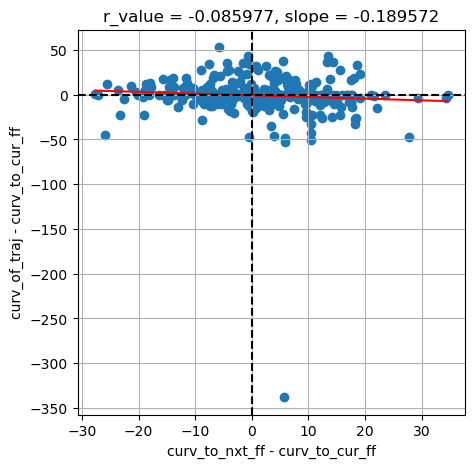

In [3]:

normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = stops_near_ff_based_on_ref_class.StopsNearFFBasedOnRef(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'



snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                              #ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers,
                               stops_near_ff_df_exists_ok=True)

snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.prepare_to_make_plots()

## visualize

### matplotlib

In [4]:
current_i = 0

diff_in_abs: 30.21957792483941
nxt_ff_index: 4
cur_ff_index: 3
duration after eliminating unnecessary parts:  [27.412363, 33.201428]
duration_to_plot: [27.412363, 33.201428]
currentTrial: 4 num_trials: 3
shown_ff_indices:  []


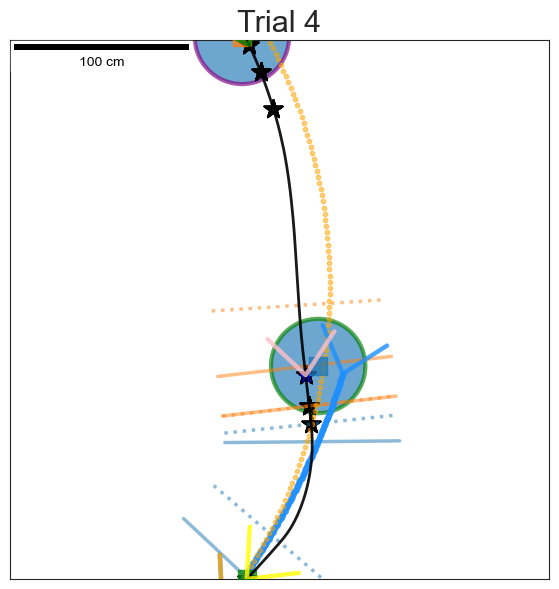

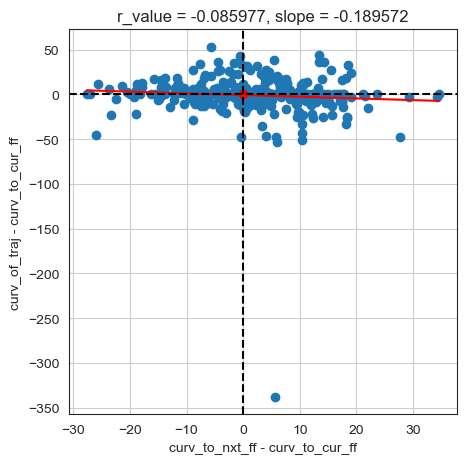

In [5]:
current_i = snf.make_individual_plots_in_matplotlib(current_i, max_num_plot_to_make = 1)

### show eye positions

diff_in_abs: 14.955238374453657
nxt_ff_index: 5
cur_ff_index: 4
duration after eliminating unnecessary parts:  [30.201428, 34.201428]
duration_to_plot: [30.201428, 34.201428]
currentTrial: 5 num_trials: 2
shown_ff_indices:  []


KeyError: "None of [Int64Index([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,\n            ...\n            226, 227, 228, 229, 230, 231, 241, 242, 243, 244],\n           dtype='int64', length=230)] are in the [index]"

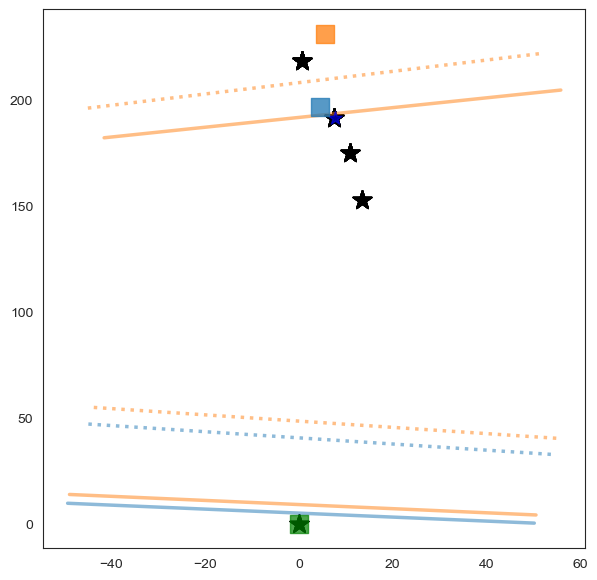

In [7]:
additional_plotting_kwargs={'show_connect_path_ff_specific_indices': None, 'show_ff_indices': True,
                            'show_eye_positions':True,
                            'show_eye_positions_for_both_eyes':True,
                            'show_connect_path_eye_positions': True}
current_i = snf.make_individual_plots_in_matplotlib(current_i, max_num_plot_to_make=3, 
                                      additional_plotting_kwargs=additional_plotting_kwargs,
                                      show_position_in_scatter_plot=False)

In [ ]:
stop here!

### plotly

In [27]:
current_i = 2
snf.make_PlotTrials_args()

In [ ]:
current_i = snf.make_individual_plotly_plots(current_i, max_num_plot_to_make=1, 
                                             show_eye_positions_for_both_eyes=True)

# Dash

## main

In [29]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326'

In [ ]:
gc.collect()

In [ ]:
test_or_control='test'


ref_point_params = {'ref_point_mode': 'time after cur ff visible',
                    'ref_point_value': 0}


curv_of_traj_params = {'curv_of_traj_mode': 'distance',
                        'window_for_curv_of_traj': [-25, 25],
                        'truncate_curv_of_traj_by_time_of_capture': False}


overall_params = {'eliminate_outliers': True,
                  'use_curvature_to_ff_center': False,
                  'normalize': False,
                  'remove_i_o_modify_rows_with_big_ff_angles': True,
                  'change_units_to_degrees_per_m': True,
                  'heading_instead_of_curv': True}  


scatter_plot_params = {
    "use_two_y_axes": False,
    "show_nxt_ff_curv_in_scatterplot": True,
    "show_cur_ff_curv_in_scatterplot": True,
}

monkey_plot_params = {
    "show_visible_fireflies": True,
    "show_in_memory_fireflies": False,
    "show_monkey_heading": False,
    "show_visible_segments": True,
    "show_traj_portion": True,
    "show_null_arcs_to_ff": True,
    "show_stops": True,
    "show_all_eye_positions": False,
    "show_current_eye_positions": True,
    "show_eye_positions_for_both_eyes": True,
}
     
#data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)                       
dc = dash_main_class.DashMainPlots(raw_data_folder_path=raw_data_folder_path)


dc.prepare_to_make_dash_for_main_plots(monkey_plot_params=monkey_plot_params,
                                        scatter_plot_params=scatter_plot_params,
                                        ref_point_params=ref_point_params,
                                        curv_of_traj_params=curv_of_traj_params,
                                        overall_params=overall_params,
                                        stops_near_ff_df_exists_ok=True,
                                        test_or_control=test_or_control)




In [ ]:
dc.fig.show()
dc.fig_scatter_combd.show()

In [ ]:
gc.collect()

In [ ]:
dc.get_more_monkey_data()

### dash

In [ ]:
dc.make_dash_for_main_plots(show_trajectory_scatter_plot=True, show_shuffled_correlation_plot=False) 

### clean up

In [ ]:
# dc.app.server.shutdown()

In [ ]:
import gc

# Now we're done with the data, so we can delete it and run the garbage collector.
del dc.app
gc.collect()

### more fig

In [ ]:
for index, row in dc.stops_near_ff_df_counted.iterrows():
    dc.stops_near_ff_row = row
    dc.stop_point_index = row.stop_point_index
    dc._prepare_to_make_plotly_fig_for_dash_given_stop_point_index(dc.stop_point_index)
    dc.fig = dc._produce_fig_for_dash()
    dc.fig.show()

    if index == 2:
        break


## for eye positions

In [ ]:
from numpy import linalg as LA

monkey_height = -10

values = np.arange(-99, 99, 1)

gaze_world_x = np.repeat(values, len(values))
gaze_world_y = np.repeat(values.reshape([1, -1]), len(values), axis=0).reshape(-1)


body_theta = np.random.uniform(-pi, pi, len(gaze_world_x))
body_x = np.random.uniform(-100, 100, len(gaze_world_x))
body_y = np.random.uniform(-100, 100, len(gaze_world_x))


gaze_monkey_view_x = gaze_world_x - body_x
gaze_monkey_view_y = gaze_world_y - body_y
gaze_monkey_view_xy = np.stack((gaze_monkey_view_x, gaze_monkey_view_y), axis=1)
gaze_monkey_view_r = LA.norm(gaze_monkey_view_xy, axis=1)

theta_to_north = np.arctan((gaze_world_x - body_x) / np.sqrt(monkey_height**2 + (gaze_world_y-body_y)**2))
to_adjust = np.where(gaze_monkey_view_y < 0)[0]
# 
theta_to_north[to_adjust] = np.sign(theta_to_north[to_adjust]) * (pi - np.abs(theta_to_north[to_adjust]))


hor_theta = theta_to_north
ver_theta = np.arctan(monkey_height / gaze_monkey_view_r)

gaze_monkey_view_x_recovered, gaze_monkey_view_y_recovered, _, gaze_world_x_recovered, gaze_world_y_recovered \
    = eye_positions.apply_formulas_to_convert_eye_position_to_ff_position(hor_theta, ver_theta, body_theta, monkey_height, body_x, body_y,
                        interocular_dist=0, rotate_world_xy_based_on_m_angle_to_get_abs_coord=False)

plt.scatter(gaze_world_x, gaze_world_x_recovered)
plt.show()

In [ ]:
gaze_monkey_view_y = dc.monkey_information['gaze_monkey_view_y'].values
gaze_monkey_view_y[gaze_monkey_view_y < 0] = 0
gaze_monkey_view_y[gaze_monkey_view_y > 1500] = 1500
sns.histplot(gaze_monkey_view_y, binwidth=20)
plt.show()


In [ ]:
sns.histplot(theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )], bins=50)
plt.show()

In [ ]:
ab = theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )]
max(ab[ab < 1.57])

In [ ]:
ab = theta_to_north[np.where(np.abs(ver_theta + 0.29414615) < 0.01 )]
min(ab[ab > 1.57])

# Diff in distance

In [ ]:
dc.stops_near_ff_df['d_from_cur_ff_to_nxt_ff'].max()

In [42]:
dc.make_stops_near_ff_df_test(exists_ok=True)
dc.make_stops_near_ff_df_ctrl(exists_ok=True)

In [ ]:
sns.histplot(dc.stops_near_ff_df_test['d_from_cur_ff_to_nxt_ff'], binwidth=20, stat='density', alpha=0.5, color='orange')
sns.histplot(dc.stops_near_ff_df_ctrl['d_from_cur_ff_to_nxt_ff'], binwidth=20, stat='density', alpha=0.5, color='blue')
plt.show()


# Scatterplot for heading_info_df

In [ ]:
normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False

# oh...curv_of_traj doesn't matter if we're only looking at heading. 
# but we can def play around with the hyperparameters for ref_point
curv_of_traj_mode = 'specific index'
curv_of_traj_mode = 'distance'
window_for_curv_of_traj = [-25, 25]

# data_item_info = find_stops_near_ff_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = stops_near_ff_based_on_ref_class.StopsNearFFBasedOnRef(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'

snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj,
                               truncate_curv_of_traj_by_time_of_capture=False,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers)
snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.get_null_arc_info_for_counted_points(use_fixed_arc_length=False)

## normal

In [ ]:
snf._make_cur_and_nxt_ff_df()
snf._make_heading_info_df()

In [ ]:
ang_traj_nxt, ang_cur_nxt, heading_info_df_no_na = show_planning_utils.get_ang_traj_nxt_and_ang_cur_nxt(snf.heading_info_df.copy())

In [54]:
# ang_traj_nxt, ang_cur_nxt, heading_info_df_no_na = show_planning_utils.get_ang_traj_nxt_and_ang_cur_nxt(dsp.combd_heading_df_x_sessions.copy())

In [ ]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, fit_intercept=False, omit_outliers=True)

## Q13 only

In [ ]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, q13_only=True, fit_intercept=False, omit_outliers=True)

## Abs value

In [ ]:
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=True, omit_outliers=True)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=False)
slope, intercept, r_value, p_value, results = show_planning_utils.conduct_linear_regression_to_show_planning(ang_traj_nxt, ang_cur_nxt, use_abs_values=True, fit_intercept=False, omit_outliers=True)

# Under-turn?

In [69]:
# for 4 ff
ref_point_mode = 'distance'
ref_point_value = -150

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions()
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_combd_heading_df_x_sessions_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=True)


In [ ]:
# control
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_ctrl['cur_d_heading_of_arc']) - np.abs(ps.combd_heading_df_x_sessions_ctrl['d_heading_of_traj']))).describe()

In [ ]:
# test
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) - np.abs(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).describe()

In [ ]:
(180/math.pi * ps.combd_heading_df_x_sessions_test[['cur_d_heading_of_arc', 'd_heading_of_traj']]).describe()

In [ ]:
(180/math.pi * np.abs(ps.combd_heading_df_x_sessions_test[['cur_d_heading_of_arc', 'd_heading_of_traj']])).describe()

In [ ]:
(180/math.pi * (np.abs(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) - np.abs(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).describe()

In [75]:
num_rows_mismatched_signs = np.abs((np.sign(ps.combd_heading_df_x_sessions_test['cur_d_heading_of_arc']) - np.sign(ps.combd_heading_df_x_sessions_test['d_heading_of_traj']))).sum()/2

In [ ]:
num_rows_mismatched_signs

In [ ]:
num_rows_mismatched_signs/len(ps.combd_heading_df_x_sessions_test)

## Monkey Bruno prefers to turn left

In [78]:
monkey_dw = dc.monkey_information['monkey_dw'].values

In [79]:
monkey_dw = monkey_dw*180/math.pi

In [ ]:
(180/math.pi * dc.monkey_information['monkey_dw']).describe()

In [81]:
monkey_dw_sub = monkey_dw[np.abs(monkey_dw) < 20]

In [ ]:
len(monkey_dw_sub)/len(monkey_dw)

In [ ]:
np.sum(monkey_dw)/360

In [ ]:
# how many 360 circles did the monkey make?
np.sum(monkey_dw_sub)/360